# Architectures for Big Data: Lab - MongoDB

**Author**: Mustapha BEDOUI

**Version**: 11 December 2023

##Task 0 : StepUp


### 1. Create a data store directory for the MongoDB server. Launch the server (mongod) and write down the commands you used. On which port does it run ?

1.1 Create a data base :

In [ ]:

cd D:\
md "\data\db"


1.2 Start MongoDB dataBase :

In [ ]:
mongod --dbpath="D:\data\db"

1.3 MongoDB dataBase runs on port 270217 :

{"t":{"$date":"2023-12-11T17:10:21.110+01:00"},"s":"I",  "c":"CONTROL",  

"id":4615611,
 "ctx":"initandlisten","msg":"MongoDB starting",


 "attr":{"pid":3136,
                    **"port"**:**27017**
              "dbPath":"D:/data/db","architecture":"64-bit","host":"Hustler"}}



### 2. Import the file **moviepeople-10.jsonl** into the server :


In [ ]:
mongoimport --db lab2 --collection movie_people --file C:\Users\dj_ma\OneDrive\Documents\Cours\CLOUD\TP2\lab_2_datasets\moviepeople-10.jsonl

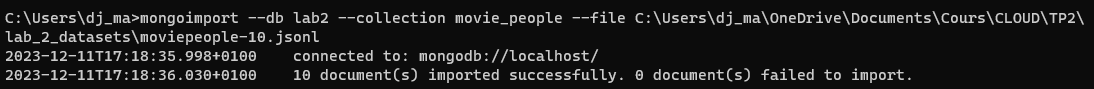

### 3. Launch a mongo shell client, and ask a query to retrieve all the data :

First we need to start a new command-prompt and launch **mongosh** and then **use lab 2** :
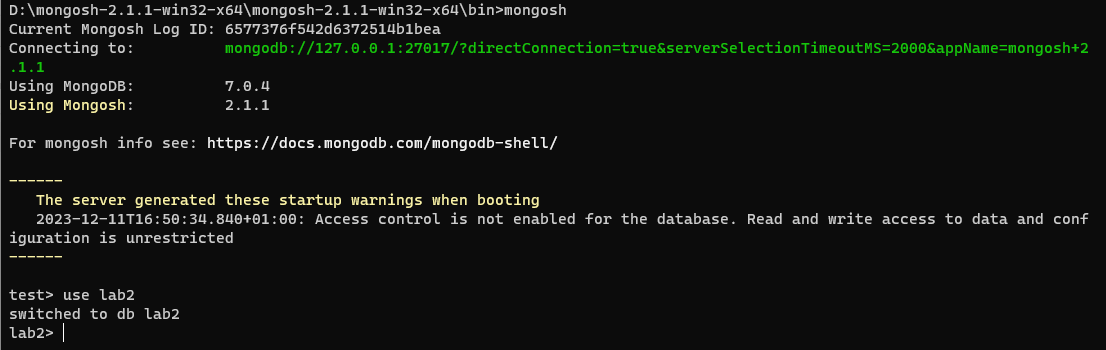

As a command to ask a query to retrieve all the data we could use : **db.movie_people.find( { } )**

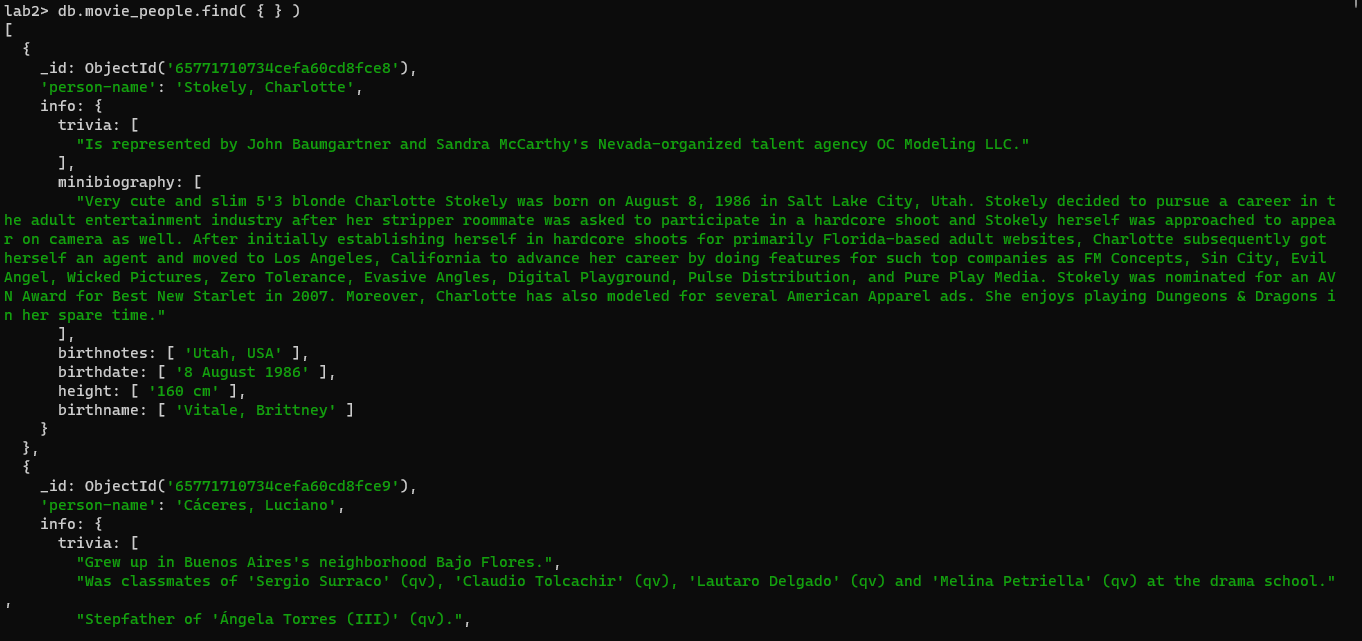

In [ ]:
m

##Task 1: Import and querying


###1. Import the files moviepeople-3000.jsonl and cities.jsonl into the server (the one set up in Task 0)

In [ ]:

mongoimport --db lab2 --collection movie_people --file C:\Users\dj_ma\OneDrive\Documents\Cours\CLOUD\TP2\lab_2_datasets\moviepeople-3000.jsonl
mongoimport --db lab2 --collection cities --file C:\Users\dj_ma\OneDrive\Documents\Cours\CLOUD\TP2\lab_2_datasets\cities.jsonl


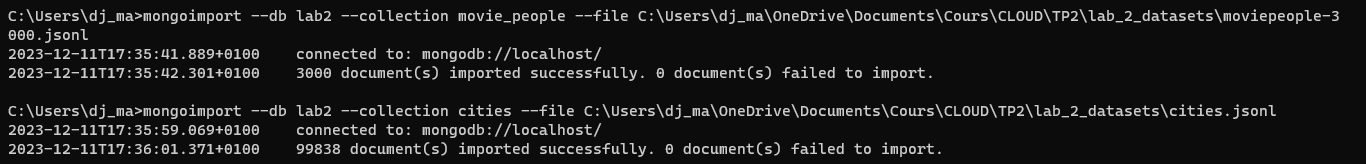

###2. In the mongo client shell, write queries to find:

####a. Information about the person called Barbara Norton de Matos

In [ ]:
db.movie_people.find({"person-name": "Norton de Matos, Bárbara"})

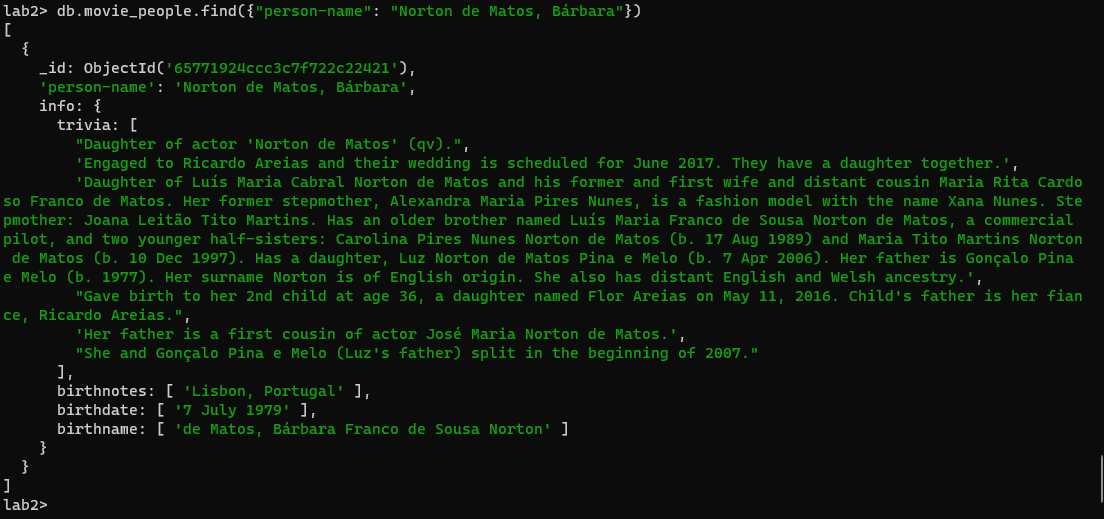

####b.  The birthplace of Steven Spielberg

In [ ]:
db.movie_people.find( {"person-name": "Spielberg, Steven"},{"_id": 0,"info": {"birthnotes": 1}})

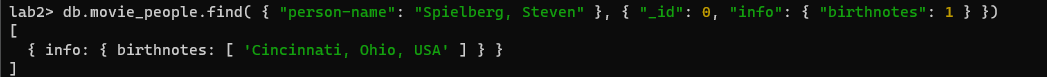

####c.  The number of people born in Lisbon

In [ ]:
db.movie_people.aggregate([ { $match: { "info.birthnotes": { $in: ["Lisbon, Portugal"] } } }, { $group: { "_id": "$info.birthnotes", "count": { $count: { } } }}])

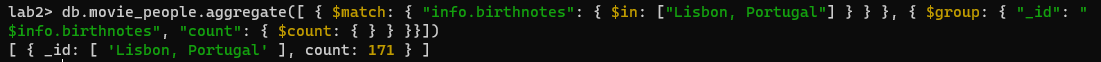

####d. The people taller than 170 cm


In [ ]:
  db.movie_people.find({ $or: [ { $and: [ { "info.height": {$regex: ".*cm"}},
        { "info.height": {$gt: "170 cm"}} ] }, { $and: [ { "info.height": {$regex: "(?!.*?cm)^.*$"}}, { "info.height": {$gte: "5' 7"}} ] } ]}, {"person-name": 1, "info.height": 1} )

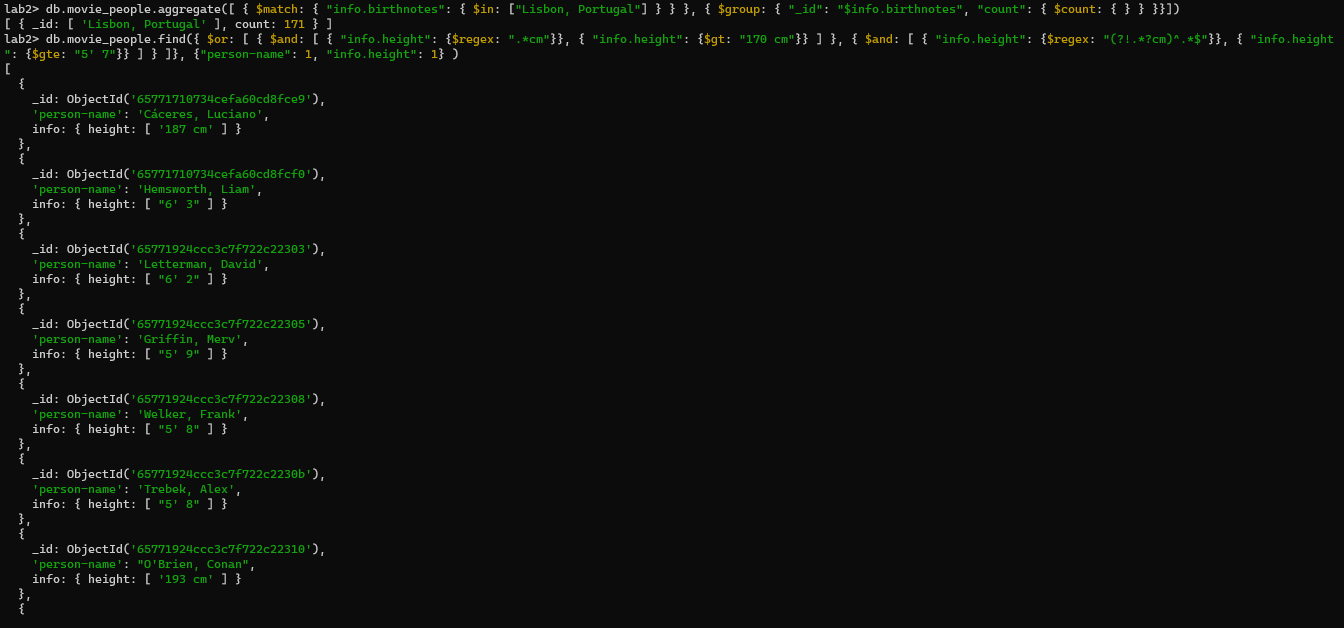

####e.  The names of people whose information contains “Opera”

In [ ]:
db.movie_people.find({"info.otherworks": {$regex: "Opera"}}, {"person-name": 1})

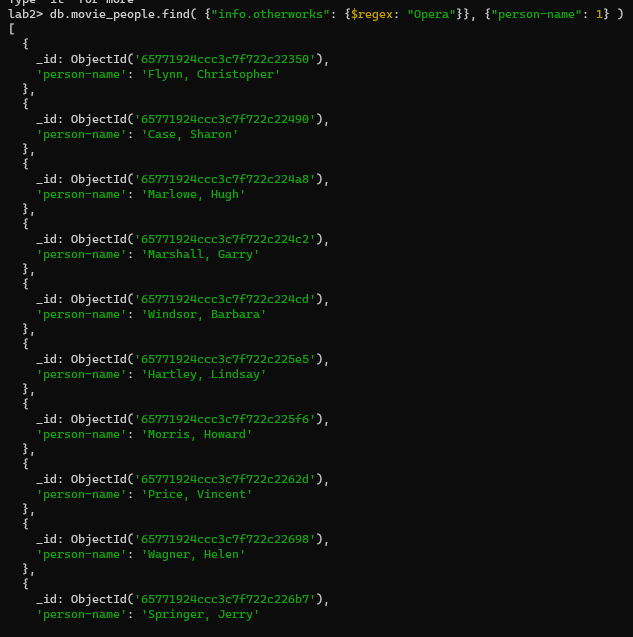

####f. The last spouse of each person who have ever had one




In [ ]:
db.movie_people.aggregate( [ {$project: {"person-name": 1, "info.spouse": 1}}, {$unwind: {path: "$info.spouse"}},
                        { $group: { "_id": "$person-name", "lastSpouse": {$last: "$info.spouse"}, "countSpouse": {$count: {}} } },
                                          {$match: {"countSpouse": {$gte: 1}} }, {$project: {"person-name": "$_id", "lastSpouse": 1, "_id": 0}} ] )

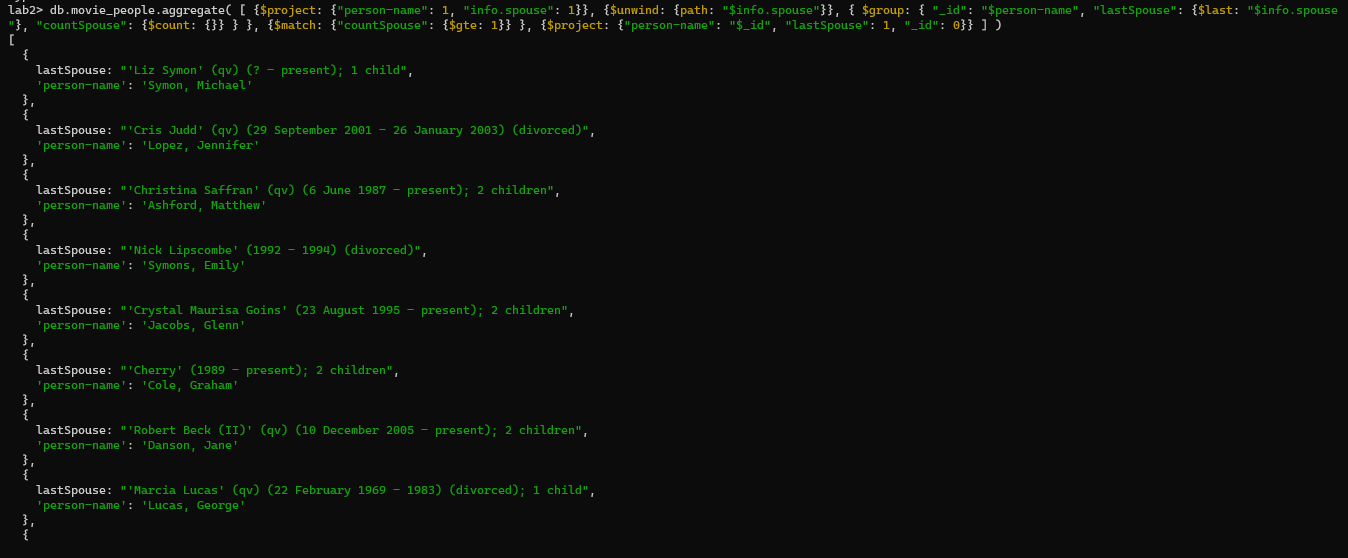

####g. For each movie person whose birth place is known, the latitude, longitude and population of the corresponding city (if such information exist for the city).

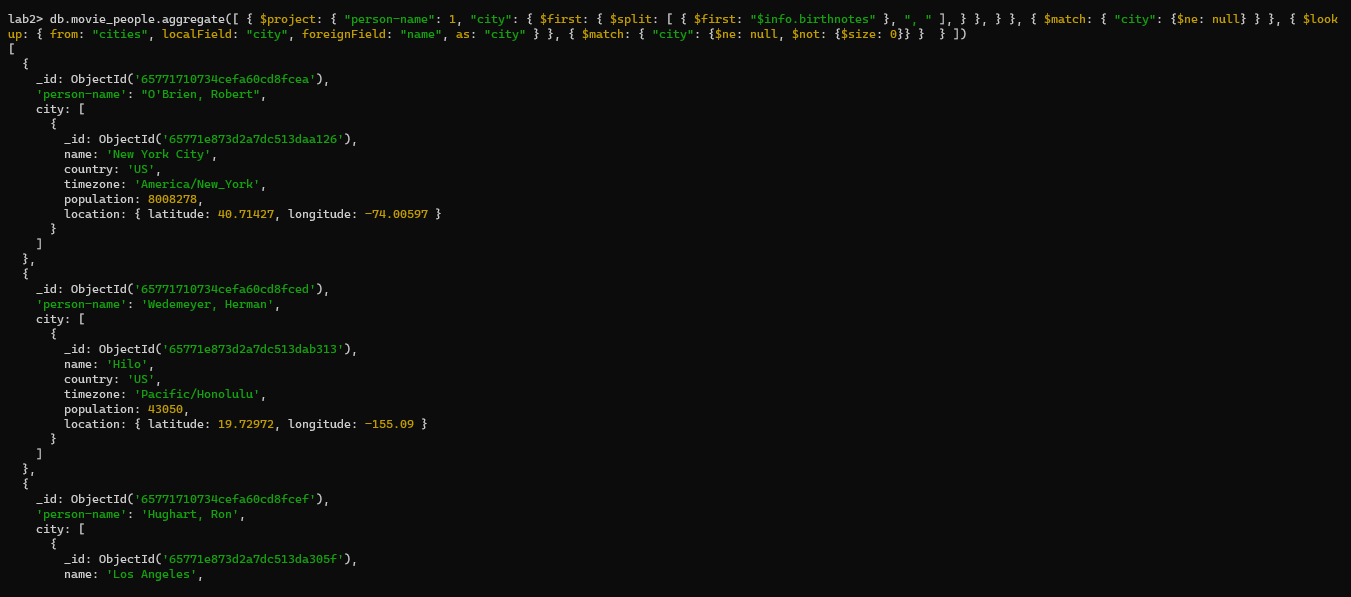

##Task 2: Replication


###1. Create data store directories for three MongoDB servers.


In [ ]:

md D:\data\db1
md D:\data\db2
md D:\data\db3


###2. Create a replica set for a collection called small-movie. Hint: to do that you will need to launch the three MongoDB servers (in different shells) and let them run.


In [ ]:
mongod --replSet "rp0" --dbpath D:\data\db1 --port 27011
mongod --replSet "rp0" --dbpath D:\data\db2 --port 27012
mongod --replSet "rp0" --dbpath D:\data\db3 --port 27013

###3. Connect a mongo client to one of the servers. Through the client, initialize the replication: add one other server as secondary, and add the third one as arbiter.


In [ ]:
mongosh --port 27011

initiate the replica set by inputing :

In [ ]:
rs.initiate()

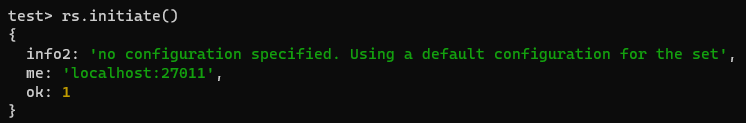

In [ ]:
rs.conf()

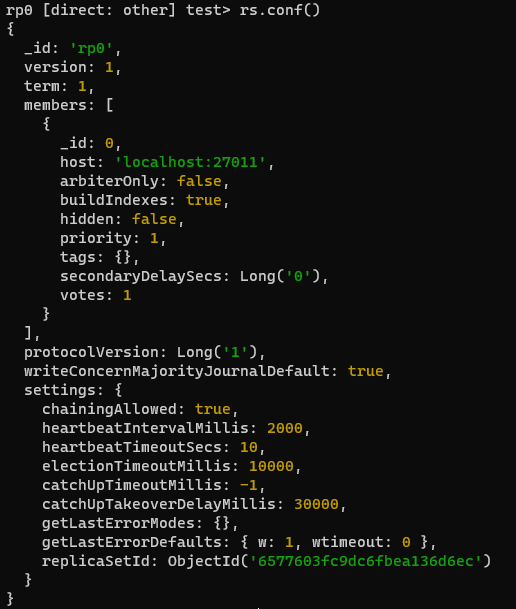

In [ ]:
rs.add('localhost:27012')

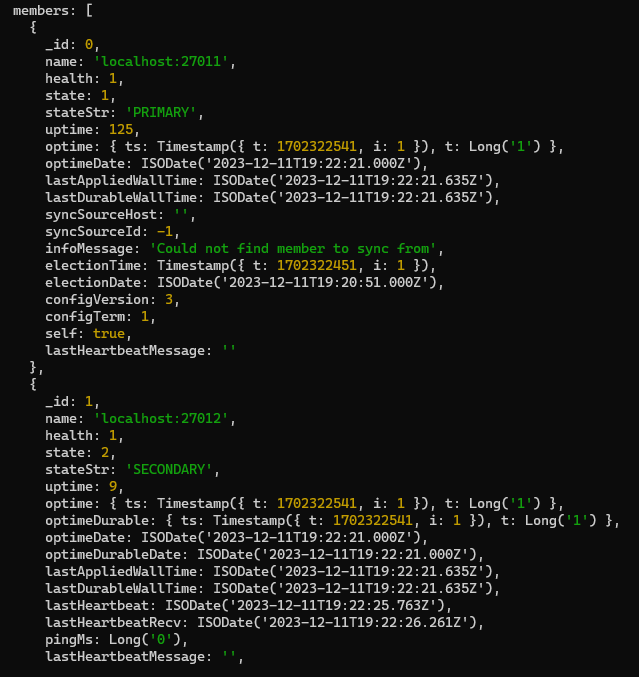

In [ ]:
rs.addArb('localhost:27013')

###4. Identify the master from the outputs of the servers, as well as by requesting replica set information from the servers.


In [ ]:
rs.status()

In [ ]:
rp0 [direct: primary] test> rs.status()
{
  set: 'rp0',
  date: ISODate('2023-12-11T19:50:09.205Z'),
  myState: 1,
  term: Long('1'),
  syncSourceHost: '',
  syncSourceId: -1,
  heartbeatIntervalMillis: Long('2000'),
  majorityVoteCount: 2,
  writeMajorityCount: 2,
  votingMembersCount: 3,
  writableVotingMembersCount: 3,
  optimes: {
    lastCommittedOpTime: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
    lastCommittedWallTime: ISODate('2023-12-11T19:50:03.084Z'),
    readConcernMajorityOpTime: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
    appliedOpTime: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
    durableOpTime: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
    lastAppliedWallTime: ISODate('2023-12-11T19:50:03.084Z'),
    lastDurableWallTime: ISODate('2023-12-11T19:50:03.084Z')
  },
  lastStableRecoveryTimestamp: Timestamp({ t: 1702324193, i: 1 }),
  electionCandidateMetrics: {
    lastElectionReason: 'electionTimeout',
    lastElectionDate: ISODate('2023-12-11T19:20:51.013Z'),
    electionTerm: Long('1'),
    lastCommittedOpTimeAtElection: { ts: Timestamp({ t: 1702322450, i: 1 }), t: Long('-1') },
    lastSeenOpTimeAtElection: { ts: Timestamp({ t: 1702322450, i: 1 }), t: Long('-1') },
    numVotesNeeded: 1,
    priorityAtElection: 1,
    electionTimeoutMillis: Long('10000'),
    newTermStartDate: ISODate('2023-12-11T19:20:51.911Z'),
    wMajorityWriteAvailabilityDate: ISODate('2023-12-11T19:20:52.027Z')
  },
  members: [
    {
      _id: 0,
      name: 'localhost:27011',
      health: 1,
      state: 1,
      stateStr: 'PRIMARY',
      uptime: 1788,
      optime: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
      optimeDate: ISODate('2023-12-11T19:50:03.000Z'),
      lastAppliedWallTime: ISODate('2023-12-11T19:50:03.084Z'),
      lastDurableWallTime: ISODate('2023-12-11T19:50:03.084Z'),
      syncSourceHost: '',
      syncSourceId: -1,
      infoMessage: '',
      electionTime: Timestamp({ t: 1702322451, i: 1 }),
      electionDate: ISODate('2023-12-11T19:20:51.000Z'),
      configVersion: 5,
      configTerm: 1,
      self: true,
      lastHeartbeatMessage: ''
    },
    {
      _id: 1,
      name: 'localhost:27012',
      health: 1,
      state: 2,
      stateStr: 'SECONDARY',
      uptime: 1671,
      optime: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
      optimeDurable: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
      optimeDate: ISODate('2023-12-11T19:50:03.000Z'),
      optimeDurableDate: ISODate('2023-12-11T19:50:03.000Z'),
      lastAppliedWallTime: ISODate('2023-12-11T19:50:03.084Z'),
      lastDurableWallTime: ISODate('2023-12-11T19:50:03.084Z'),
      lastHeartbeat: ISODate('2023-12-11T19:50:07.553Z'),
      lastHeartbeatRecv: ISODate('2023-12-11T19:50:07.582Z'),
      pingMs: Long('0'),
      lastHeartbeatMessage: '',
      syncSourceHost: 'localhost:27011',
      syncSourceId: 0,
      infoMessage: '',
      configVersion: 5,
      configTerm: 1
    },
    {
      _id: 2,
      name: 'localhost:27013',
      health: 1,
      state: 7,
      stateStr: 'ARBITER',
      uptime: 1305,
      optime: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
      optimeDurable: { ts: Timestamp({ t: 1702324203, i: 1 }), t: Long('1') },
      optimeDate: ISODate('2023-12-11T19:50:03.000Z'),
      optimeDurableDate: ISODate('2023-12-11T19:50:03.000Z'),
      lastAppliedWallTime: ISODate('2023-12-11T19:50:03.084Z'),
      lastDurableWallTime: ISODate('2023-12-11T19:50:03.084Z'),
      lastHeartbeat: ISODate('2023-12-11T19:50:07.552Z'),
      lastHeartbeatRecv: ISODate('2023-12-11T19:50:08.049Z'),
      pingMs: Long('0'),
      lastHeartbeatMessage: '',
      syncSourceHost: '',
      syncSourceId: -1,
      infoMessage: '',
      configVersion: 5,
      configTerm: 1
    }
  ],
  ok: 1,
  '$clusterTime': {
    clusterTime: Timestamp({ t: 1702324203, i: 1 }),
    signature: {
      hash: Binary.createFromBase64('AAAAAAAAAAAAAAAAAAAAAAAAAAA=', 0),
      keyId: Long('0')
    }
  },
  operationTime: Timestamp({ t: 1702324203, i: 1 })
}

###5. Import moviepeople-1000.jsonl through the master. Observe the output of the two other servers.


In [ ]:
mongoimport --db lab2 --collection movie_people --file C:\Users\dj_ma\OneDrive\Documents\Cours\CLOUD\TP2\lab_2_datasets\moviepeople-1000.jsonl

###6. Once the synchronization is finished, stop the master. Observe and report the output of the two other servers.

Now, we exclude the primary server and observe the responses from the remaining two. After a brief period, both begin to display messages signifying that they are conducting an election to determine the next primary server.

In [ ]:
{
"t":{"$date":"2023-12-11T20:10:53"},
"s":"I",
"c":"ELECTION",
"id":4615652,
"ctx":"ReplCoord-2",
"msg":"Starting an election, since we've seen no PRIMARY in election timeout
period",
"attr":{"electionTimeoutPeriodMillis":10000}
}
{
"t":{"$date":"023-12-11T20:10:53"},
"s":"I",
"c":"ELECTION",
"id":21438,
"ctx":"ReplCoord-2",
"msg":"Conducting a dry run election to see if we could be elected",
"attr":{"currentTerm":4}
}

And after the election, the server output:

In [ ]:
{
"t":{"$date":"2023-12-11T20:20:03"},
"s":"I",
"c":"ELECTION",
"id":21450,
"ctx":"ReplCoord-2",
"msg":"Election succeeded, assuming primary role",
"attr":{"term":5}
}

##Task 3: Sharding

###1. Create data store directories and start two shard servers.

In [ ]:

mkdir D:/data/db1
mkdir D:/data/db2
mkdir D:/data/db2


For the initiale server :

In [ ]:
mongod --configsvr --replSet rp0 --dbpath D:/data/db1 --port 27020
mongosh --port 27020
rs.initiate({_id: "configReplSet", configsvr: true, members: [{_id: 0, host: "localhost:27020"}]})

For the 2 other servers :

In [ ]:
mongod --shardsvr --replSet rp1 --dbpath D:/data/db2 --port 27021
mongosh --port 27021
rs.initiate({_id: "configReplSet", configsvr: true, members: [{_id: 0, host: "localhost:27021"}]})
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
mongod --shardsvr --replSet rp2 --dbpath D:/data/db3 --port 27022
mongosh --port 27022
rs.initiate({_id: "configReplSet", configsvr: true, members: [{_id: 0, host: "localhost:27022"}]})

mongos is a MongoDB component known as the "shard router." It acts as an interface between your application and the sharded cluster, directing client requests to the appropriate shard(s) and handling queries that involve data from multiple shards.

In [ ]:
mongos --configdb rp0/localhost:27020 --bind_ip localhost --port 27023

Add Shards to mongos:

In [ ]:

mongosh --port 27023
sh.addShard("rp1/localhost:27021")
sh.addShard("rp2/localhost:27022")

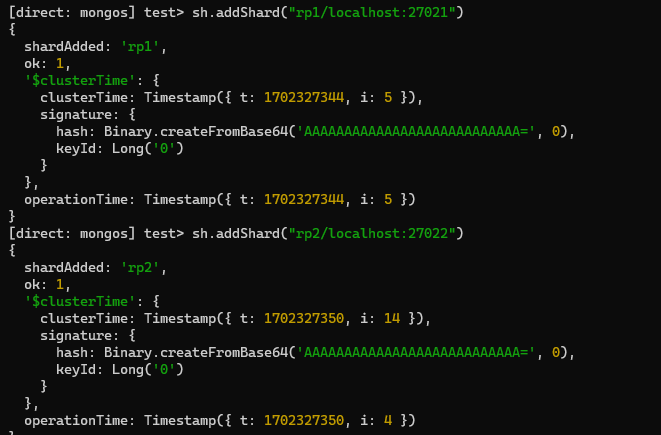

###2. Shard the cities from cities.jsonl by the country

We shard the collection :

In [ ]:
sh.shardCollection("lab2.cities", {"country": "hashed"})

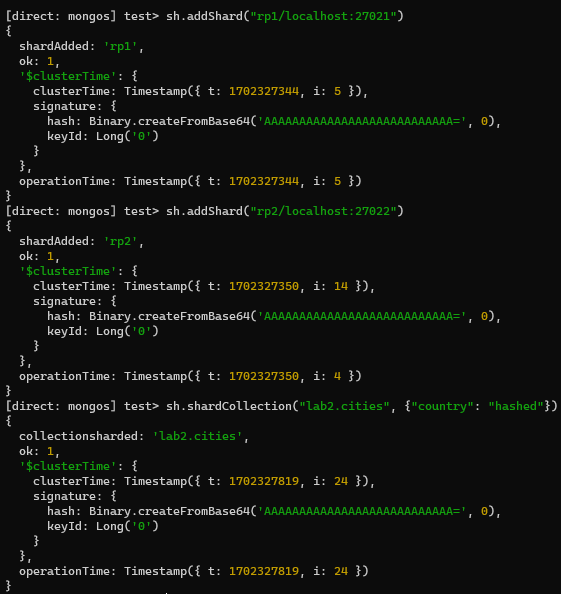

To see the status of the sharding :

In [ ]:
 sh.status()

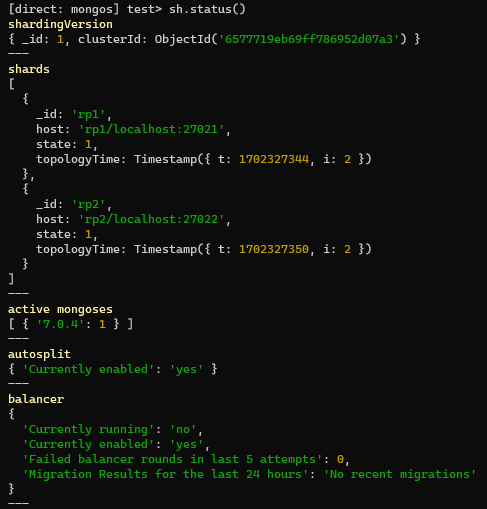

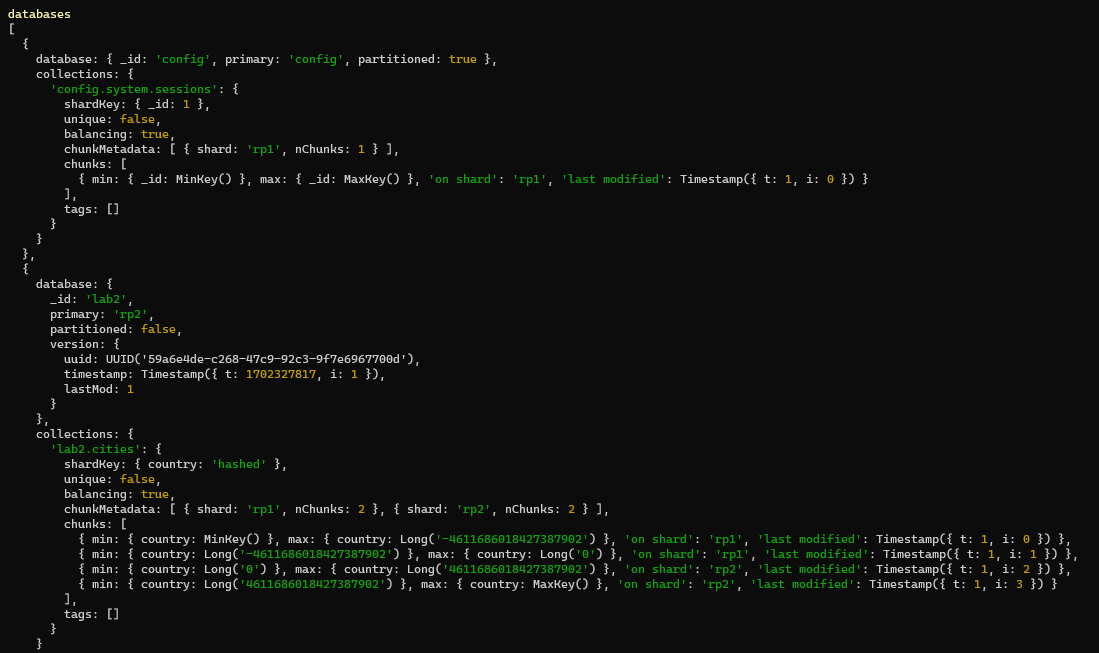